## CNN手写字符识别

In [36]:
import torch
import torch.nn as nn
from torch import optim
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Hyper parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True
learning_rate = 0.05

### 数据加载

In [29]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

#
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

test_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

test_loader = Data.DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)


### CNN

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 25, kernel_size=3),
            nn.BatchNorm2d(25),
            nn.ReLU(inplace=True)
        )

        self.layer2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(25, 50, kernel_size=3),
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True)
        )

        self.layer4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc = nn.Sequential(
            nn.Linear(50 * 5 * 5, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


### 训练

In [48]:
losses = []
acces = []

# 选择模型
model = CNN()
# model = net.Activation_Net(28 * 28, 300, 100, 10)
# model = net.Batch_Net(28 * 28, 300, 100, 10)
if torch.cuda.is_available():
    model = model.cuda()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 训练模型
epoch = 0
for data in train_loader:
    img, label = data
    # img = img.view(img.size(0), -1)
    img = Variable(img)
    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()
    else:
        img = Variable(img)
        label = Variable(label)
    out = model(img)
    loss = criterion(out, label)
    print_loss = loss.data.item()
    
    _, pred = torch.max(out, 1)
    num_correct = (pred == label).sum()
    eval_acc = num_correct.item()/len(pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch+=1
    losses.append(loss.data.item())
    acces.append(eval_acc)
    if epoch%50 == 0:
        print('epoch: {}, loss: {:.4} , acc : {}'.format(epoch, loss.data.item(),eval_acc))


epoch: 50, loss: 1.055 , acc : 0.74
epoch: 100, loss: 0.3286 , acc : 0.94
epoch: 150, loss: 0.213 , acc : 0.9
epoch: 200, loss: 0.1972 , acc : 0.92
epoch: 250, loss: 0.2012 , acc : 0.94
epoch: 300, loss: 0.1404 , acc : 0.98
epoch: 350, loss: 0.08106 , acc : 0.96
epoch: 400, loss: 0.06412 , acc : 1.0
epoch: 450, loss: 0.09025 , acc : 0.96
epoch: 500, loss: 0.04844 , acc : 1.0
epoch: 550, loss: 0.07852 , acc : 0.98
epoch: 600, loss: 0.1218 , acc : 0.96
epoch: 650, loss: 0.06274 , acc : 0.96
epoch: 700, loss: 0.2031 , acc : 0.96
epoch: 750, loss: 0.09254 , acc : 0.96
epoch: 800, loss: 0.02973 , acc : 1.0
epoch: 850, loss: 0.1219 , acc : 0.94
epoch: 900, loss: 0.0804 , acc : 0.96
epoch: 950, loss: 0.02437 , acc : 1.0
epoch: 1000, loss: 0.03325 , acc : 0.98
epoch: 1050, loss: 0.05944 , acc : 0.98
epoch: 1100, loss: 0.008377 , acc : 1.0
epoch: 1150, loss: 0.02196 , acc : 1.0
epoch: 1200, loss: 0.1424 , acc : 0.96


In [49]:
# 模型评估
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
    img, label = data
    # img = img.view(img.size(0), -1)
    img = Variable(img)
    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()

    out = model(img)
    loss = criterion(out, label)
    eval_loss += loss.data.item()*label.size(0)
    _, pred = torch.max(out, 1)
    num_correct = (pred == label).sum()
    eval_acc += num_correct.item()
print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
    eval_loss / (len(test_data)),
    eval_acc / (len(test_data))
))

Test Loss: 0.053868, Acc: 0.982600


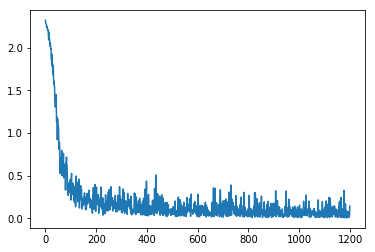

In [50]:
x = np.arange(0,len(losses),1)
plt.plot(x,losses,"-")

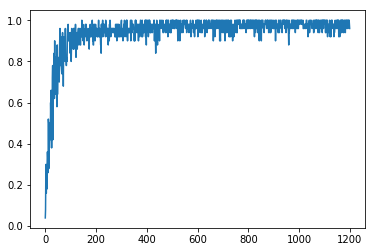

In [51]:
x = np.arange(0,len(acces),1)
plt.plot(x,acces,"-")